In [1]:
library(Seurat)
library(SeuratDisk)
library(ggplot2)
library(dplyr)
library(limma)
library(edgeR)
source('RA_asgard_scripts/voomByGroup.r')
# set.seed(2024)

Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Pseudobulk

In [33]:
SC.integrated.RA <- LoadH5Seurat("/home/icb/zihe.zheng/projects/asgard/RA_data/rna_obj_clinical_ctap.h5Seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [3]:
pseudo_ra <- AggregateExpression(SC.integrated.RA, assays = "RNA", return.seurat = TRUE, 
                                 group.by = c("sample", "cluster_name"))

Centering and scaling data matrix



In [4]:
clinical = read.csv('RA_data/metadata_clin_donor_singlecell.csv', sep = ';')
clinical$sample = clinical$mRNA_run

pseudo_ra@meta.data$sample = pseudo_ra@meta.data$orig.ident

new_meta = merge(pseudo_ra@meta.data, clinical, by = "sample", all.x = TRUE)
rownames(new_meta) = rownames(pseudo_ra@meta.data)

In [5]:
new_meta <- new_meta %>%
    mutate(cell_type = case_when(
        grepl('B-', rownames(.)) ~ "B cell/plasma cell",
        grepl('NK-', rownames(.)) ~ "NK",
        grepl('T-', rownames(.)) ~ "T cell",
        grepl('F-', rownames(.)) ~ "Stromal cell",
        grepl('E-', rownames(.)) ~ "Endothelial cell",
        grepl('M-', rownames(.)) ~ "Myeloid cell",
        TRUE ~ NA_character_
  ))

In [6]:
pseudo_ra@meta.data = new_meta

In [8]:
SaveH5Seurat(pseudo_ra, filename = "/home/icb/zihe.zheng/projects/asgard/RA_data/rna_obj_clinical_bulk.h5Seurat", overwrite = TRUE)

Warning message:
“Overwriting previous file /home/icb/zihe.zheng/projects/asgard/RA_data/rna_obj_clinical_bulk.h5Seurat”
Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding scale.data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [9]:
saveRDS(pseudo_ra, file = "/home/icb/zihe.zheng/projects/asgard/RA_data/rna_obj_clinical_bulk.rds")

## DE bulk Wilcoxon

In [ ]:
bulk <- LoadH5Seurat("/home/icb/zihe.zheng/projects/asgard/RA_data/rna_obj_clinical_bulk.h5Seurat")

In [23]:
unique(bulk@meta.data$cell_type)

[1] "B cell/plasma cell" "Endothelial cell"   "Stromal cell"      
[4] "Myeloid cell"       "NK"                 "T cell"

In [11]:
i = 'Stromal cell'
Idents(bulk) <- "cell_type"
c_cells <- subset(bulk, cell_type == i)
Idents(c_cells) <- "disease"

In [25]:
markers.stromal <- FindMarkers(c_cells, ident.1 = "RA", ident.2 = "OA")

In [27]:
markers.stromal

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MYCL,5.193416e-23,-1.9435178,0.204,0.663,1.741768e-18
IL1B,1.309743e-22,-1.8563169,0.560,0.955,4.392617e-18
AC020656.1,3.356054e-22,-2.0219073,0.541,0.955,1.125553e-17
CD33,4.431615e-22,-2.0010831,0.406,0.865,1.486275e-17
AIF1,1.109258e-20,-1.9072565,0.762,0.989,3.720229e-16
MMP2-AS1,1.534207e-20,-0.8497514,0.184,0.640,5.145424e-16
PTPRO,2.092765e-20,-1.6831620,0.377,0.831,7.018714e-16
MPEG1,2.303511e-20,-1.9245016,0.518,0.888,7.725515e-16
TLR7,2.963428e-20,-1.9781940,0.358,0.787,9.938745e-16


In [21]:
markers.stromal[c('PTGS2', 'PTGER3', 'ICAM1', 'IFIT2', 'RSAD2', 'STAT1', 'XAF1', 'CCL2', 'CXCL9'), ]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PTGS2,7.751477e-11,-1.6411375,0.487,0.809,2.599690e-06
PTGER3,5.548552e-10,-0.8951126,0.137,0.393,1.860874e-05
ICAM1,2.073383e-10,-1.1219117,0.790,0.921,6.953711e-06
IFIT2,1.531071e-15,-1.7933246,0.733,0.921,5.134906e-11
RSAD2,3.621751e-10,-1.3241449,0.575,0.876,1.214663e-05
STAT1,8.457969e-10,-1.4106586,0.906,0.989,2.836634e-05
XAF1,1.034573e-08,-0.9476432,0.902,0.989,3.469750e-04
CCL2,2.644732e-05,-0.7919001,0.662,0.854,8.869901e-01
CXCL9,1.969114e-07,-2.4779832,0.439,0.674,6.604015e-03


In [19]:
## load in results from limma DE pseudobulk
T_cell = readRDS('/home/icb/zihe.zheng/projects/asgard/RA_data/DE_gene_list_bulk_T cell.rds')$`T cell`
B_cell = readRDS('/home/icb/zihe.zheng/projects/asgard/RA_data/DE_gene_list_bulk_B_plasma_cell.rds')$`B cell/plasma cell`
# monocytes
NK = readRDS('/home/icb/zihe.zheng/projects/asgard/RA_data/DE_gene_list_bulk_NK.rds')$`NK`
myeloid = readRDS('/home/icb/zihe.zheng/projects/asgard/RA_data/DE_gene_list_bulk_Myeloid cell.rds')$`Myeloid cell`
# fibroblasts
stromal = readRDS('/home/icb/zihe.zheng/projects/asgard/RA_data/DE_gene_list_bulk_Stromal cell.rds')$`Stromal cell`
# endothelial
endo = readRDS('/home/icb/zihe.zheng/projects/asgard/RA_data/DE_gene_list_bulk_Endothelial cell.rds')$`Endothelial cell`


In [20]:
stromal[c('PTGS2', 'PTGER3', 'ICAM1', 'IFIT2', 'RSAD2', 'STAT1', 'XAF1', 'CCL2', 'CXCL9'), ]

,score,adj.P.Val,P.Value
,<dbl>,<dbl>,<dbl>
PTGS2,3.3479788,1.965534e-03,8.582666e-04
PTGER3,-2.5705618,1.621132e-02,1.036205e-02
ICAM1,1.1808696,2.844049e-01,2.380616e-01
IFIT2,1.8837805,8.097669e-02,6.001515e-02
RSAD2,-0.4099407,7.223426e-01,6.819768e-01
STAT1,-4.6573452,4.511085e-05,3.843630e-06
XAF1,-2.5597891,1.666802e-02,1.068563e-02
CCL2,4.9571909,1.282746e-05,9.011210e-07
CXCL9,3.2396179,2.572308e-03,1.254349e-03


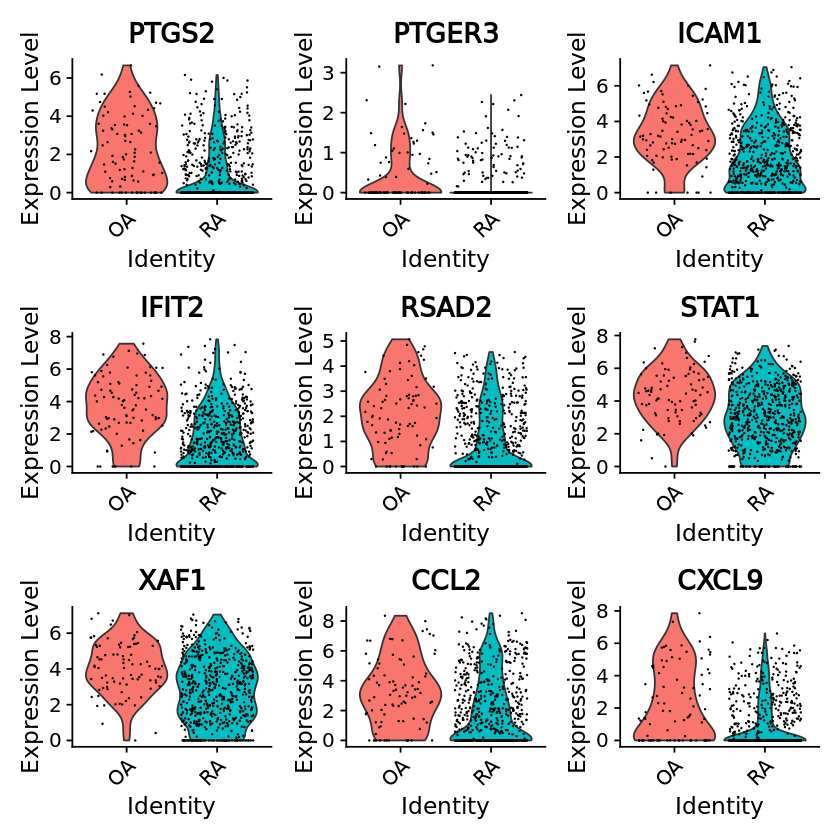

In [32]:
VlnPlot(c_cells, 
        features = c('PTGS2', 'PTGER3', 'ICAM1', 'IFIT2', 'RSAD2', 'STAT1', 'XAF1', 'CCL2', 'CXCL9'), 
        idents = c("OA", "RA")) 

In [34]:
## check expression in single cell
i = 'Stromal cell'
Idents(SC.integrated.RA) <- "cell_type"
c_cells <- subset(SC.integrated.RA, cell_type == i)
Idents(c_cells) <- "disease"

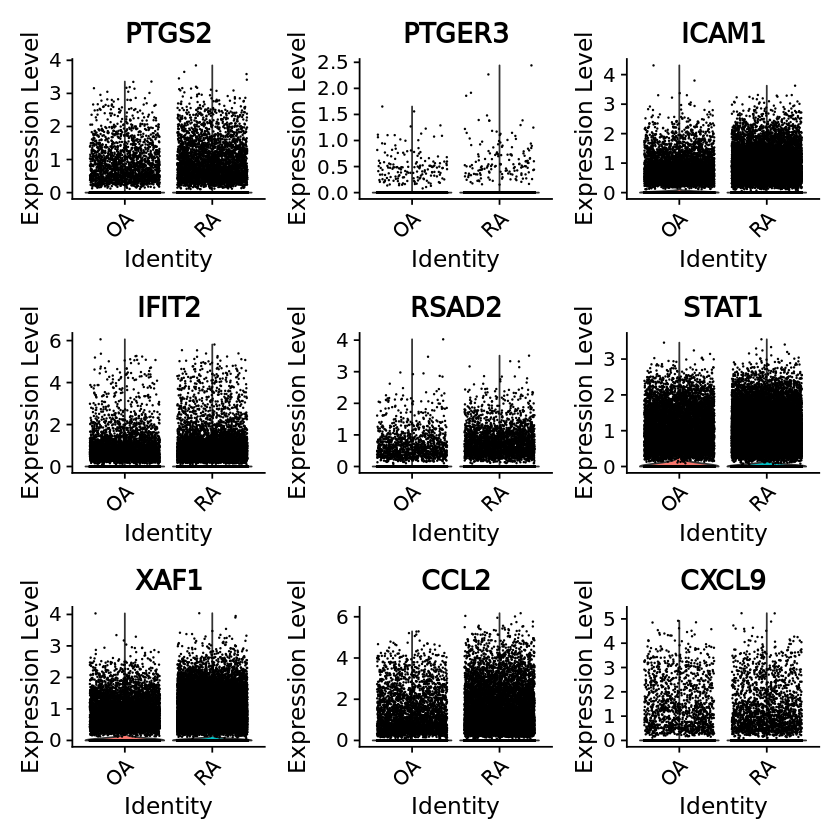

In [35]:
VlnPlot(c_cells, 
        features = c('PTGS2', 'PTGER3', 'ICAM1', 'IFIT2', 'RSAD2', 'STAT1', 'XAF1', 'CCL2', 'CXCL9'), 
        idents = c("OA", "RA")) 